In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [2]:
stock_ticker_name = 'META'

In [3]:
df = pd.read_csv('meta-stocks.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-08-19,37.430000,38.279999,37.139999,37.810001,37.732464,57609600
1,2013-08-20,38.349998,38.580002,37.689999,38.410000,38.331234,57995200
2,2013-08-21,38.380001,38.849998,38.150002,38.320000,38.241417,46116900
3,2013-08-22,38.369999,38.750000,38.340000,38.549999,38.470943,21931200
4,2013-08-23,39.000000,40.630001,38.930000,40.549999,40.466843,86442300
...,...,...,...,...,...,...,...
2764,2024-08-13,520.010010,531.500000,518.150024,528.539978,528.539978,13743800
2765,2024-08-14,528.059998,534.000000,523.130005,526.760010,526.760010,11444200
2766,2024-08-15,531.789978,539.770020,526.700012,537.330017,537.330017,13482100
2767,2024-08-16,531.900024,533.659973,524.659973,527.419983,527.419983,14759400


In [4]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [7]:
data = df[df['Date'] <= '2020-01-01']

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))

In [9]:
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [10]:
prediction_days = 14

In [11]:
x_train=[]
y_train=[]


In [12]:
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x,0])

In [13]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [15]:
# Build model
model = Sequential()

In [16]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

C:\Users\deadh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.add(Dropout(0.2))

In [18]:
model.add(LSTM(units=50, return_sequences=True))

In [19]:
model.add(Dropout(0.2))

In [20]:
model.add(LSTM(units=50))

In [21]:
model.add(Dropout(0.2))

In [22]:
model.add(Dense(units=1)) # Prediciton of the next closing value

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0823
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0050
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0037
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0039
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0040
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0034
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0032
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0030
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0034
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0036
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0035
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0029
Epoch 13/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0029
Epoch 14/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0028
Epoch 15/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0029
Epoc

In [25]:
# Test the model accuracy on existing data
test_data = df[df['Date'] > '2020-01-01']

In [26]:
actual_price = test_data['Close'].values

In [27]:
total_dataset = pd.concat((df['Close'], test_data['Close']), axis=0)

In [28]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values

In [29]:
model_inputs = model_inputs.reshape(-1, 1)

In [30]:
model_inputs = scaler.transform(model_inputs)

In [31]:
# Make Predictions on Test Data
x_test = []

In [32]:
range (prediction_days, len(model_inputs))

range(14, 1179)

In [33]:
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x - prediction_days:x, 0])

In [34]:
len(x_test)

1165

In [35]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [36]:
predicted_prices = model.predict(x_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


In [37]:
predicted_prices = scaler.inverse_transform(predicted_prices)

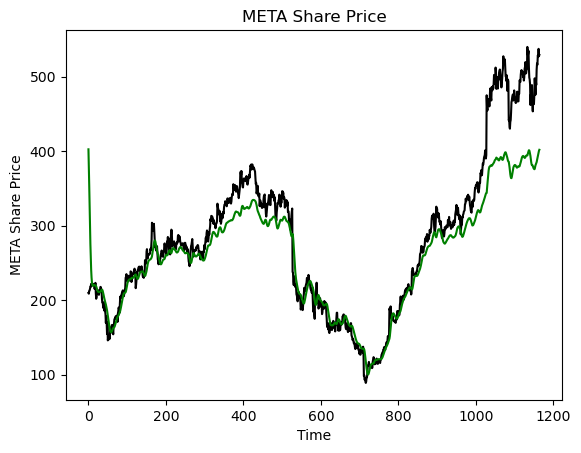

In [38]:
plt.plot(actual_price, color='black', label=f'Actual {stock_ticker_name} Price')
plt.plot(predicted_prices, color='green', label=f'Predicted {stock_ticker_name} Price')
plt.title(f'{stock_ticker_name} Share Price')
plt.xlabel('Time')
plt.ylabel(f'{stock_ticker_name} Share Price')
plt.show()

In [39]:
# Predict Next Day
real_data = [model_inputs[len(model_inputs)+1 - prediction_days:len(model_inputs+1), 0]]

In [40]:
real_data = np.array(real_data)

In [41]:
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

In [42]:
prediction = model.predict(real_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step


In [43]:
prediction = scaler.inverse_transform(prediction)

In [44]:
print(prediction)

[[404.5869]]
